### Makine Öğrenmesi


### İhtiyacımız olacak olan kütüphaneler 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sn
import sys
#from sklearn.preprocessing import Imputer

#np.set_printoptions(threshold=sys.maxsize)
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# Sürümden kaynaklı hatalı göz ardı etmek için kullanıyoruz.
warnings.filterwarnings('ignore')
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
# Keras specific
import keras 
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
#from keras.utils import to_categorical 

In [2]:



#listenin ortalama hesabunı verir
def findAverage(lst):
    return sum(lst) / len(lst)


#df=pd.read_csv('bank_marketing_dataset.csv')
df=pd.read_csv('emotions.csv')
        
df    

dataset = df.values
    
dataset


sample=df['label']

print(sample)


label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

#print(df.shape)
#print(df.head(15))
#df.describe()

#y = df["Number of Credit Problems"].values.reshape(-1,1)  #sütun haline getirdik

# x = df.drop(["Loan ID","Customer ID"
#              ,"Number of Credit Problems"
#              ,"Term","Years in current job"
#              ,"Home Ownership","Purpose"
#              ,"Years of Credit History"
#              ,"Months since last delinquent"
#              ,"Number of Open Accounts"
#              ,"Current Credit Balance"
#              ,"Maximum Open Credit"
#              ,"Bankruptcies"
#              ,"Tax Liens"
            
            
#             ],axis=1)
#print(x.head(5))

#print(y.shape)
#print(type(y))

#last=df["Months since last delinquent"].values.reshape(-1,1)



#print(x)





0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
          ...   
2127     NEUTRAL
2128    POSITIVE
2129    NEGATIVE
2130    NEGATIVE
2131     NEUTRAL
Name: label, Length: 2132, dtype: object


In [12]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    print("Toplam çıkış",y.shape)
    print("Toplam giriş",X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)


print("Eğitim için giriş verilerinin boyutu",X_train.shape)
print("Test için giriş verilerinin boyutu",X_test.shape)
print("Eğitim için çıkış verilerinin boyutu",y_train.shape)
print("Test için çıkış verilerinin boyutu",y_test.shape)



Toplam çıkış (2132,)
Toplam giriş (2132, 2548)
Eğitim için giriş verilerinin boyutu (1492, 2548)
Test için giriş verilerinin boyutu (640, 2548)
Eğitim için çıkış verilerinin boyutu (1492,)
Test için çıkış verilerinin boyutu (640,)


In [15]:

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2548))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

#Y_train = np.asarray(Y_train).astype('float32')
# Compile the model
from tensorflow import keras
import tensorflow as tf

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                163136    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 166,371
Trainable params: 166,371
Non-trainable params: 0
_________________________________________________________________


In [18]:
#validationı arttırdığımızda yani eğitim için data sayısını arttırdığımızda acc oranı artar
history = model.fit(X_train, y_train,validation_split=0.3, batch_size=32,  epochs=10) 

Epoch 1/10
33/33 [==============================] - 3s 90ms/step - loss: 3277112213504.0000 - accuracy: 0.6044 - val_loss: 634861453312.0000 - val_accuracy: 0.6317
Epoch 2/10
33/33 [==============================] - 0s 4ms/step - loss: 2802826346496.0000 - accuracy: 0.6341 - val_loss: 11238602964992.0000 - val_accuracy: 0.5692
Epoch 3/10
33/33 [==============================] - 0s 5ms/step - loss: 13892469129216.0000 - accuracy: 0.4895 - val_loss: 65696922861568.0000 - val_accuracy: 0.5826
Epoch 4/10
33/33 [==============================] - 0s 4ms/step - loss: 14232230821888.0000 - accuracy: 0.5862 - val_loss: 26102024110080.0000 - val_accuracy: 0.5938
Epoch 5/10
33/33 [==============================] - 0s 4ms/step - loss: 4596421361664.0000 - accuracy: 0.5201 - val_loss: 22032446128128.0000 - val_accuracy: 0.5625
Epoch 6/10
33/33 [==============================] - 0s 4ms/step - loss: 7129285525504.0000 - accuracy: 0.5489 - val_loss: 19481751453696.0000 - val_accuracy: 0.5737
Epoch 7/1

In [19]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.2f}%".format(model_acc * 100))

Test Accuracy: 61.56%


###  Naif Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,mean_absolute_error,accuracy_score
#X_train, X_test, y_train, y_test = preprocess_inputs(df)


gauss = GaussianNB().fit(X_train,y_train)
pred_gauss_train = gauss.predict(X_train)
pred_gauss_test = gauss.predict(X_test)

# Train accuracy
gauss_train_accr = round(gauss.score(X_train,y_train) * 100, 2)
gauss_test_accr = round(gauss.score(X_test,y_test) * 100, 2)

# Error rate
gauss_train_mae = round((mean_absolute_error(y_train, pred_gauss_train) * 100), 2)
gauss_test_mae = round((mean_absolute_error(y_test, pred_gauss_test) * 100), 2)

In [21]:
print("Gauss-Eğitim dogruluk oranı : %{}".format(gauss_train_accr))
print("Gauss-Test dogruluk oranı : %{}".format(gauss_test_accr))



Gauss-Eğitim dogruluk oranı : %39.95
Gauss-Test dogruluk oranı : %43.75


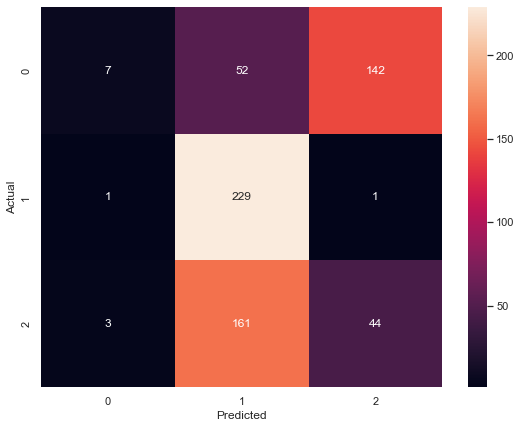

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='white')
conf_mat = confusion_matrix(y_test, pred_gauss_test)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Tahmin')
plt.show()

## K-En Yakın Komşular

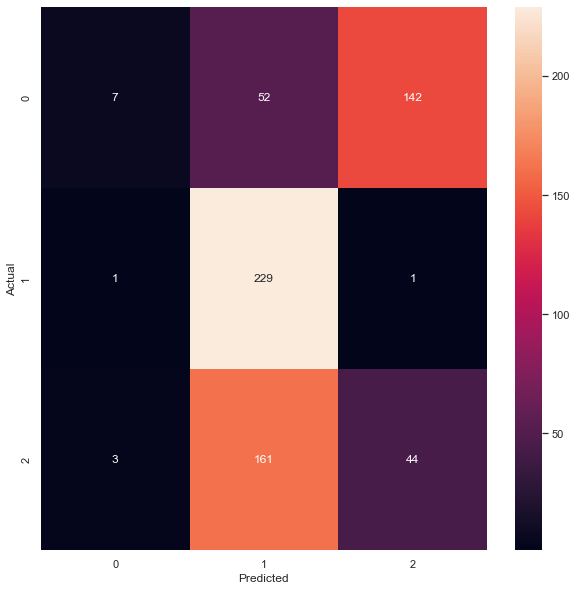

79.22
72.19


In [53]:
from sklearn.model_selection import GridSearchCV
trainAcc = []
testAcc = []
##X_train, X_test, y_train, y_test = preprocess_inputs(df)
#param kısmında komşular için 20 farklı model deneyerek cross-validated score en yüksek olanı döndürüyor.
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors':np.arange(1,8)}, cv=10)
knn = knn.fit(X_train, y_train)
pred_knn_train = knn.predict(X_train)
pred_knn_test = knn.predict(X_test)
    
knn_train_accr = round(knn.score(X_train,y_train) * 100, 2)
knn_test_accr = round(knn.score(X_test,y_test) * 100, 2)
    
trainAcc.append(knn_train_accr)
testAcc.append(knn_test_accr)   
    
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
    
print(knn_train_accr)
print(knn_test_accr)

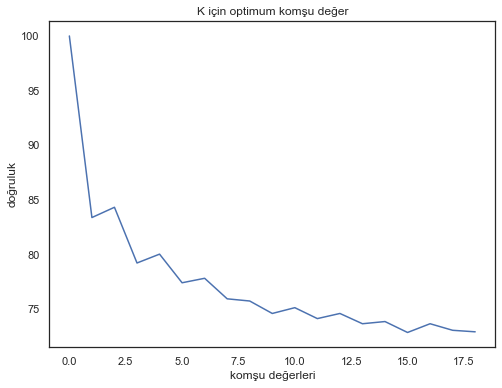

In [27]:
plt.figure(figsize=(8,6))
plt.plot(trainAcc)
plt.title('K için optimum komşu değer')
plt.ylabel('doğruluk')
plt.xlabel('komşu değerleri')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss']) plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()